In [2]:
import os 
import numpy as np
import pandas as pd
import numpy as np

from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from datetime import datetime



In [21]:
data = np.load('processed_airs_sftp/40_km_grid/mfx/2003-01-17_mfx.npz')['arr_0']
grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

min_lat= 55
max_lat= 90
min_lon= 40
max_lon= 60

select_area_indexer = grid.select_area_indexer(min_lat= min_lat,max_lat= max_lat,min_lon= min_lon,max_lon= max_lon)

data_filtered = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data)

In [22]:
lon = grid.nh_lon

TypeError: __call__() missing 1 required positional argument: 'X'

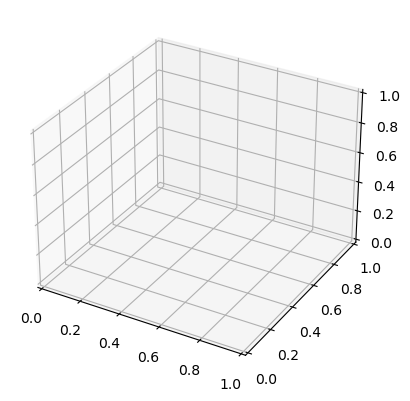

In [31]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')

# Create 2D colormesh at z=0.2
X, Y = grid.nh_lon, grid.nh_lat
Z1 = data_filtered + 0.2
ax.plot_surface(X, Y, Z1, facecolors=plt.cm.Reds_r(np.random.rand(501,501)))

# Create 2D colormesh at z=0.5
Z2 = data_filtered + 0.5
ax.plot_surface(X, Y, Z2, facecolors=plt.cm.Blues_r(np.random.rand(501,501)))


# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
ax.set_zlim(0, 1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()


In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(grid.nh_lon, grid.nh_lat)
z = np.array([1, 2, 3])  # Replace with your altitude values

ax.plot_surface(x, y, data[0], cmap='RdBu_r', alpha=0.9)
ax.plot_surface(x, y, data[1], cmap='RdBu_r', alpha=0.9)
ax.plot_surface(x, y, data[2], cmap='RdBu_r', alpha=0.9)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Momentum Flux [kg m$^{-1}$ s$^{-1}$]')
ax.set_title('Momentum Flux measurements over the Ural Mountains')

plt.show()


/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_39231/62448032.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


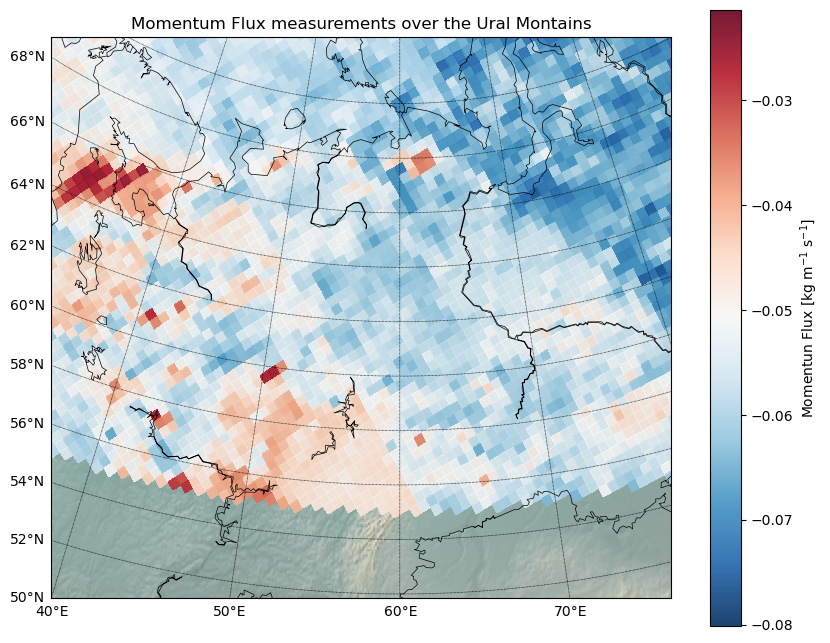

In [20]:
# Momentum Flux over Moountain Areas - Urals (use geo_plotting env)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.load('processed_airs_sftp/40_km_grid/mfx/2003-01-17_mfx.npz')['arr_0']
grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

fig = plt.figure(figsize=(10, 8))

m = Basemap(projection='stere', lon_0=60, lat_0=60, llcrnrlat=50, urcrnrlat=70,
            llcrnrlon=40, urcrnrlon=90, resolution='l')

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawparallels(np.arange(50, 71, 2), linewidth=0.5, labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(40, 91, 10), linewidth=0.5, labels=[0, 0, 0, 1])

x, y = m(grid.nh_lon, grid.nh_lat)
m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9)
m.etopo(alpha=0.5)

m.shadedrelief(scale=0.5)

plt.colorbar(label='Momentun Flux [kg m$^{-1}$ s$^{-1}$]')
plt.title('Momentum Flux measurements over the Ural Montains')

plt.show()


/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_39231/3569452158.py:58: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-5, vmax=6)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Cli

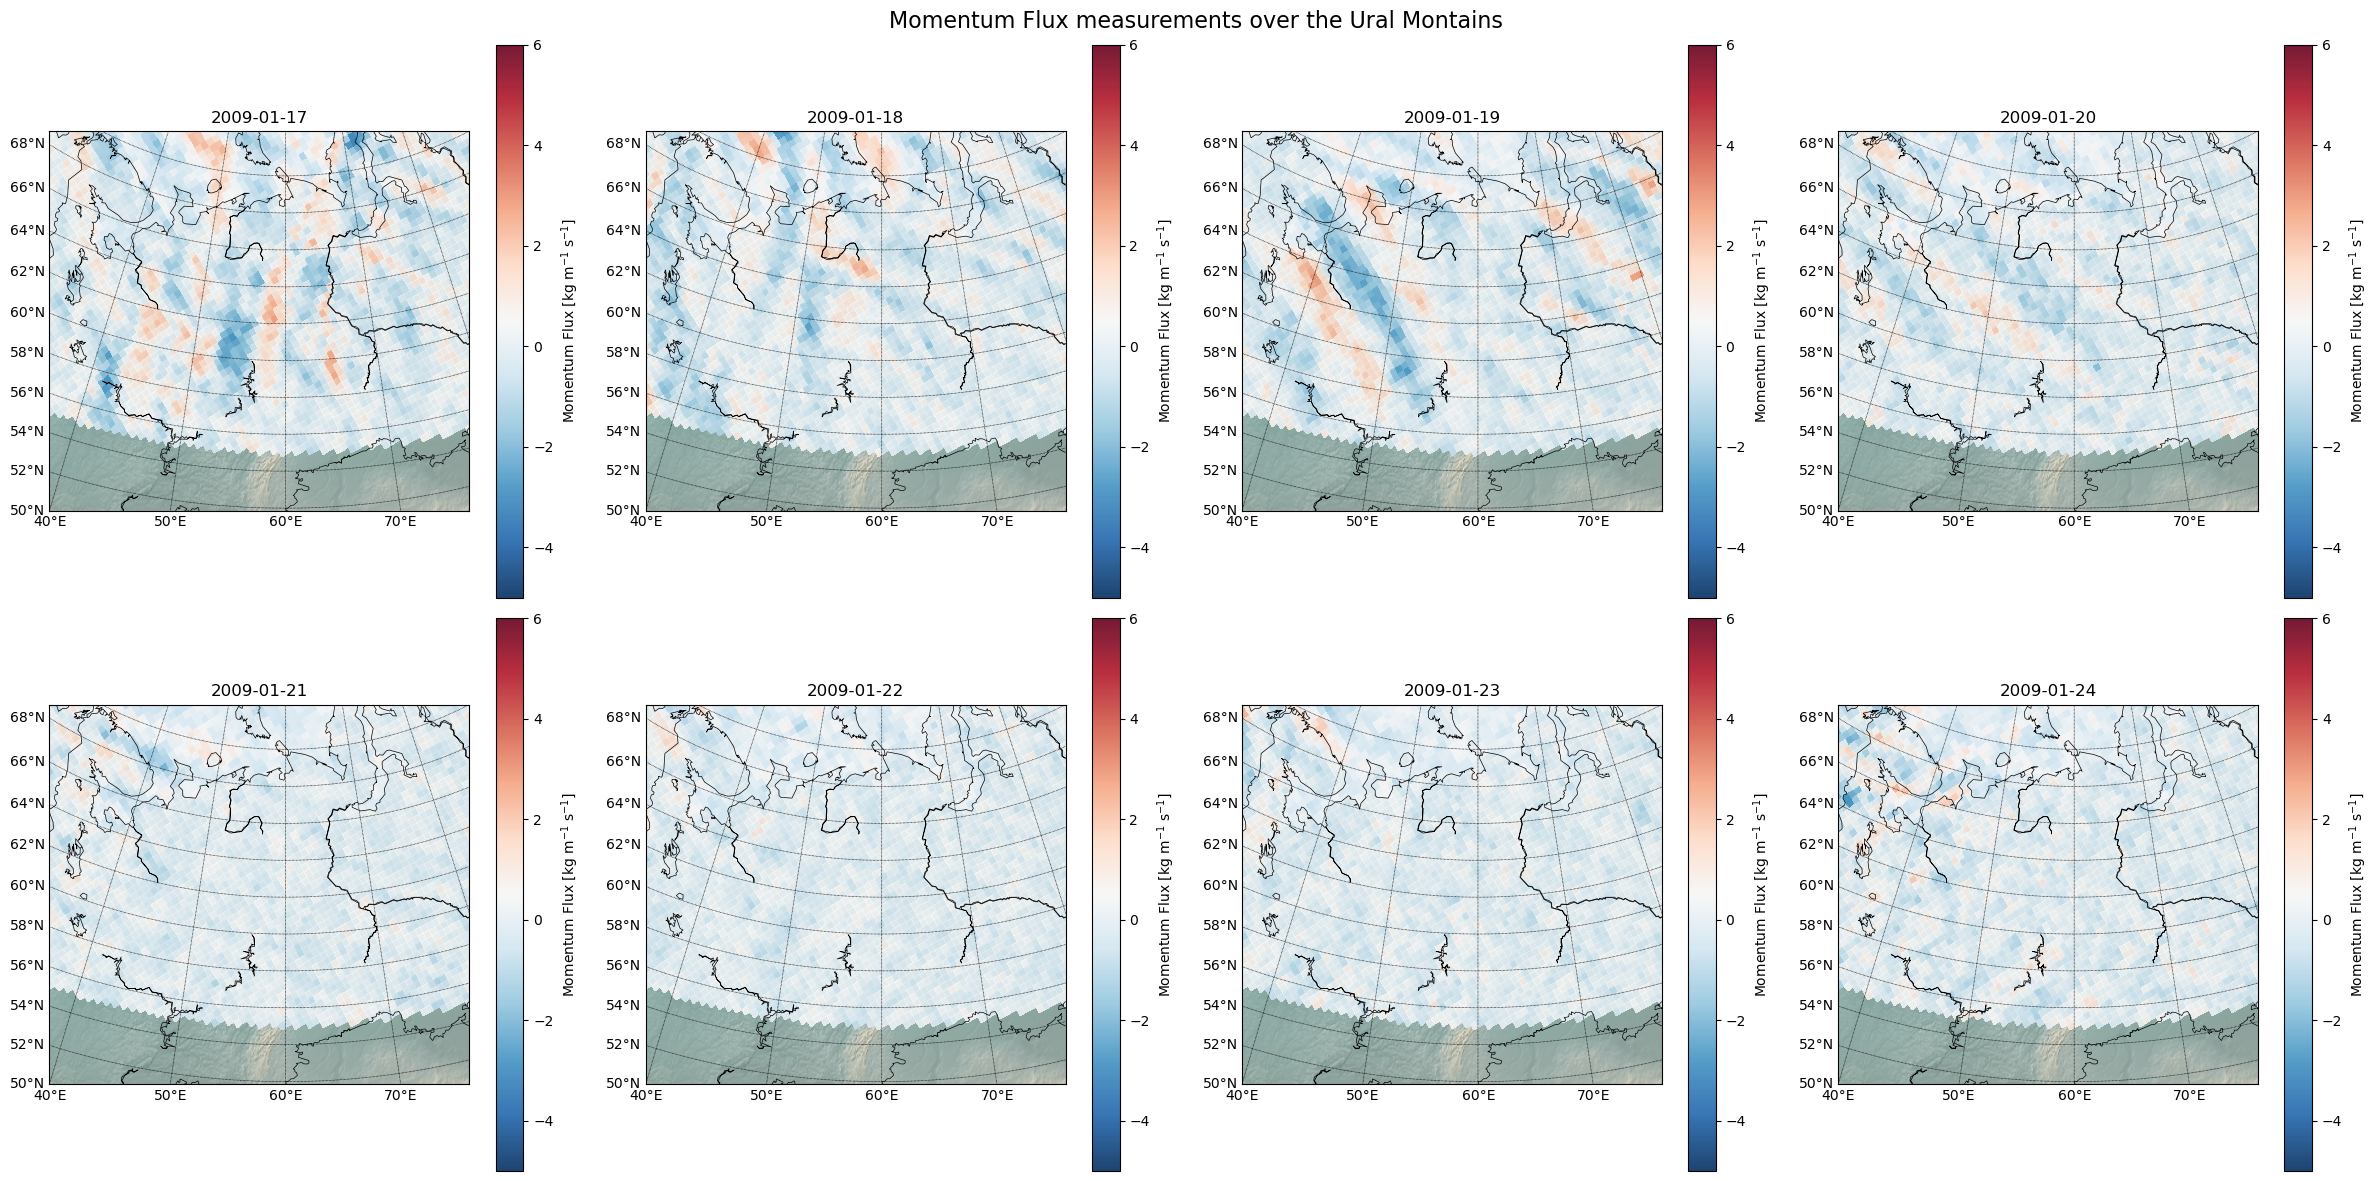

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data and create grid and wizard objects
dates = ["2009-01-17","2009-01-18","2009-01-19","2009-01-20","2009-01-21","2009-01-22","2009-01-23","2009-01-24"]

data_type = 'a'

data_1 = np.load(f'processed_airs_sftp/40_km_grid/{data_type}/{dates[0]}_{data_type}.npz')['arr_0']
data_2 = np.load(f'processed_airs_sftp/40_km_grid/{data_type}/{dates[1]}_{data_type}.npz')['arr_0']
data_3 = np.load(f'processed_airs_sftp/40_km_grid/{data_type}/{dates[2]}_{data_type}.npz')['arr_0']
data_4 = np.load(f'processed_airs_sftp/40_km_grid/{data_type}/{dates[3]}_{data_type}.npz')['arr_0']
data_5 = np.load(f'processed_airs_sftp/40_km_grid/{data_type}/{dates[4]}_{data_type}.npz')['arr_0']
data_6 = np.load(f'processed_airs_sftp/40_km_grid/{data_type}/{dates[5]}_{data_type}.npz')['arr_0']
data_7 = np.load(f'processed_airs_sftp/40_km_grid/{data_type}/{dates[6]}_{data_type}.npz')['arr_0']
data_8 = np.load(f'processed_airs_sftp/40_km_grid/{data_type}/{dates[7]}_{data_type}.npz')['arr_0']

data_dict = {'data_1': data_1,
            'data_2': data_2,
            'data_3': data_3,
            'data_4': data_4,
            'data_5': data_5,
            'data_6': data_6,
            'data_7': data_7,
            'data_8': data_8}

data = np.load('processed_airs_sftp/40_km_grid/mfx/2003-01-17_mfx.npz')['arr_0']
grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

# Set common parameters for the map
map_params = {
    'projection': 'stere',
    'lon_0': 60,
    'lat_0': 60,
    'llcrnrlat': 50,
    'urcrnrlat': 70,
    'llcrnrlon': 40,
    'urcrnrlon': 90,
    'resolution': 'l'
}

# Loop over the subplots and plot the map
data_i = 1

for i, ax in enumerate(axes.flatten()):
    m = Basemap(ax=ax, **map_params)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.drawparallels(np.arange(50, 71, 2), linewidth=0.5, labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(40, 91, 10), linewidth=0.5, labels=[0, 0, 0, 1])
    x, y = m(grid.nh_lon, grid.nh_lat)
    im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-5, vmax=6)
    m.etopo(alpha=0.5)
    m.shadedrelief(scale=0.5)
    ax.set_title(dates[data_i-1])
    # add colorbar with ranges from 
    fig.colorbar(im, ax=ax, label='Momentum Flux [kg m$^{-1}$ s$^{-1}$]', location='right')
    data_i += 1


plt.suptitle('Momentum Flux measurements over the Ural Montains', fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_32260/4200094320.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


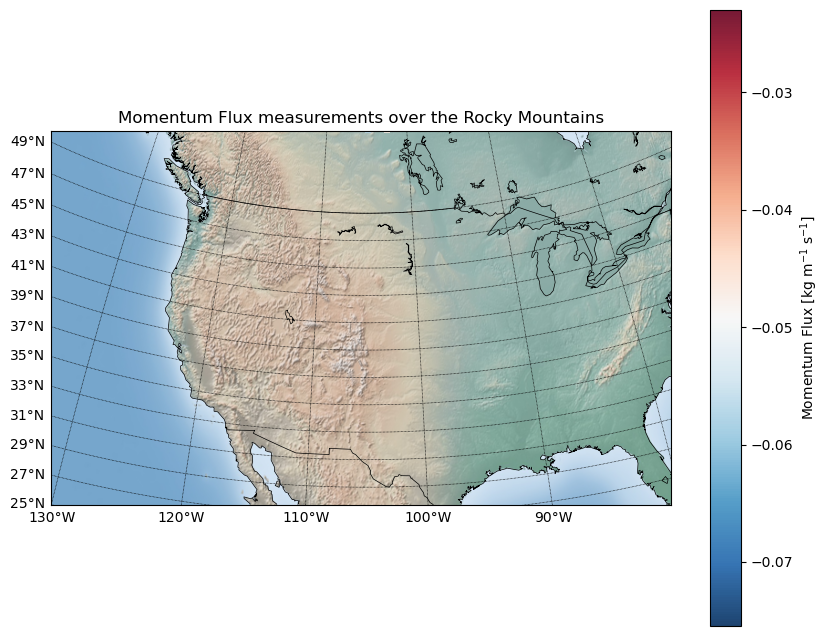

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.load('processed_airs_sftp/40_km_grid/mfx/2002-08-31_mfx.npz')['arr_0']
grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

fig = plt.figure(figsize=(10, 8))

m = Basemap(projection='stere', lon_0=-105, lat_0=40, llcrnrlat=25, urcrnrlat=50,
            llcrnrlon=-130, urcrnrlon=-70, resolution='l')

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawparallels(np.arange(25, 51, 2), linewidth=0.5, labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-130, -69, 10), linewidth=0.5, labels=[0, 0, 0, 1])

x, y = m(grid.nh_lon, grid.nh_lat)
m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9)
m.etopo(alpha=0.5)

m.shadedrelief(scale=0.5)

plt.colorbar(label='Momentum Flux [kg m$^{-1}$ s$^{-1}$]')
plt.title('Momentum Flux measurements over the Rocky Mountains')

plt.show()
